In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

import warnings

# Set the default font to Arial
import matplotlib
matplotlib.rcParams['font.family'] = 'Arial'

# Parameters

In [3]:
# The filtering based on hotspots.
# filter_version = 'including'  # 'including', 'excluding', 'only'
list_filter_versions = ['including', 'excluding', 'only']

INDEL_PREFIX = {
        'including':'indels/indels.denovo_', 
        'excluding':'indels/indels.exclHotspots.denovo_', 
        'only':'indels/indels.onlyHotspots.denovo_' 
    }#[filter_version]

FREQS_PREFIX = {
        'including':'tables/freqs.denovo_indels.', 
        'excluding':'tables/freqs.exclHotspots.', 
        'only':'tables/freqs.onlyHotspots.' 
    }#[filter_version]


# The 3 species.
list_species = ['mouse','macaque','human']
# The alignment chosen.
alignment = 'chrM'

# Import indels

In [4]:
def get_indels(filter_version):
    # Combine indels for the three species.
    INDEL_PREFIX = {
        'including':'indels/indels.denovo_', 
        'excluding':'indels/indels.exclHotspots.denovo_', 
        'only':'indels/indels.onlyHotspots.denovo_' 
    }
    list_df = []
    for species in list_species:
        df = pd.read_table( f'{INDEL_PREFIX[filter_version]}{alignment}_{species}.tab' )
        list_df.append( df )
    df_indels = pd.concat(list_df)

    # Classify as Insertion or Deletion.
    df_indels['Mutation_type'] = np.where(
        df_indels['REF'].str.len() > df_indels['ALT'].str.len(), 'Deletion',
        np.where(df_indels['REF'].str.len() < df_indels['ALT'].str.len(), 'Insertion', 'Other')
    )

    # Indel length.
    df_indels['Change_in_length'] = df_indels['ALT'].str.len() - df_indels['REF'].str.len()

    return df_indels



df_indels = get_indels('including')
df_indels

,CHROM,POS,REF,ALT,INFO,SRR_ID,value,Species,AC,AF,...,relin_POS,Tissue_type,Classification,Mutation_ID,Pedigree_shared,Filter_ID,Region,Region_size,Mutation_type,Change_in_length
0,chrM,12343,AT,A,SB=2.42169;AF=0.00495049;AC=0,SRR10068699,.:1:0.00495049:2.42169,mouse,1.0,0.004950,...,NaN,germline,Germline de novo,12343_AT_A,Unique to Individual,G133p4_12343,non-D-loop,15423,Deletion,-1
1,chrM,13053,T,TC,SB=2.11058;AF=0.00329761;AC=0,SRR10068701,.:2:0.00115607:2.64192,mouse,2.0,0.001156,...,NaN,germline,Germline de novo,13053_T_TC,Between pedigrees,G133p4_13053,non-D-loop,15423,Insertion,1
2,chrM,14806,CACCCCTACTATACAATCAAAGATATCCTAGGTATCCTAATCATAT...,C,SB=2.57858;AF=0.000629327;AC=0,SRR10068701,.:1:0.000629327:2.57858,mouse,1.0,0.000629,...,NaN,germline,Germline de novo,14806_CACCCCTACTATACAATCAAAGATATCCTAGGTATCCTAA...,Unique to Individual,G133p4_14806,non-D-loop,15423,Deletion,-58
3,chrM,14640,A,AG,SB=1.61939;AF=0.00191388;AC=0,SRR10068702,.:2:0.00191388:1.61939,mouse,2.0,0.001914,...,NaN,somatic,Somatic de novo,14640_A_AG,Unique to Individual,G133p4_14640,non-D-loop,15423,Insertion,1
4,chrM,5171,G,GA,SB=2.50905;AF=0.00293255;AC=0,SRR10068703,.:2:0.0034904:3.49031,mouse,2.0,0.003490,...,NaN,somatic,Somatic de novo,5171_G_GA,Between pedigrees,G133p4_5171,non-D-loop,15423,Insertion,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,chrM,864,A,AATGTT,SB=2.38069;AF=0.000582072;AC=0,hs006_Oo3,.:1:0.000582072:2.38069,human,1.0,0.000582,...,9034.0,germline,Germline de novo,864_A_AATGTT,NaN,hs006_864,non-D-loop,15447,Insertion,5
179,chrM,865,ACCCC,A,SB=2.38183;AF=0.000582072;AC=0,hs006_Oo3,.:1:0.000582072:2.38183,human,1.0,0.000582,...,9035.0,germline,Germline de novo,865_ACCCC_A,NaN,hs006_865,non-D-loop,15447,Deletion,-4
180,chrM,954,A,AAT,SB=1.92242;AF=0.00256082;AC=0,hs010_Oo6,.:2:0.00256082:1.92242,human,2.0,0.002561,...,9124.0,germline,Germline de novo,954_A_AAT,NaN,hs010_954,non-D-loop,15447,Insertion,2
181,chrM,960,TCCC,T,SB=1.79519;AF=0.00258065;AC=0,hs010_Oo6,.:2:0.00258065:1.79519,human,2.0,0.002581,...,9130.0,germline,Germline de novo,960_TCCC_T,NaN,hs010_960,non-D-loop,15447,Deletion,-3


# Histogram

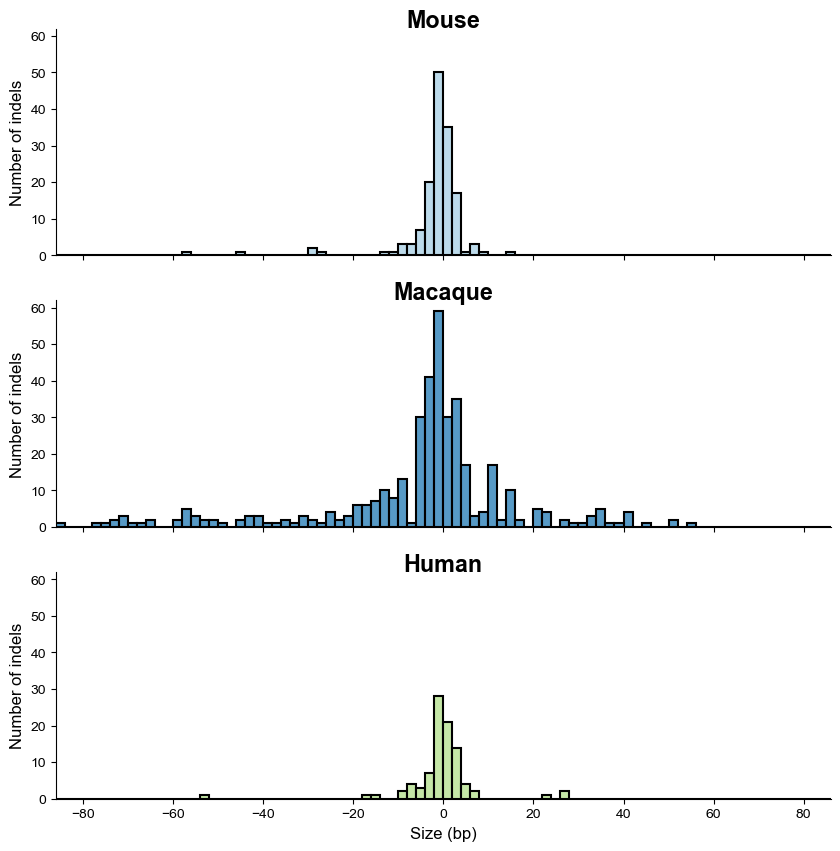

In [5]:
def histogram_sizes(filter_version='including'):
    df_indels = get_indels(filter_version)
    df = df_indels[['Species','Individual','Change_in_length']].drop_duplicates()

    # Three categorical colors (greens and blues).
    custom_palette = ['#a6cee3','#1f78b4','#b2df8a']

    # Subplots.
    fig, axes = plt.subplots(3, 1, figsize=(10,10), sharey=True)
    species_list = df['Species'].unique()

    fontsize=12
    max_length = max(abs(df['Change_in_length']))     #limits of x axis
    bins = np.arange(-max_length, max_length + 1, 2)    #keeps bin size consistent across species
    
    # Loop through each species and create a histogram
    for ax, species in zip(axes, species_list):
      sns.histplot(
        data=df[df['Species'] == species], x='Change_in_length', 
        bins=bins, 
        ax=ax, color=custom_palette[species_list.tolist().index(species)],
        linewidth=1.5
      )
      ax.set_title(species.capitalize(), weight='bold', fontsize=fontsize*1.4, y=0.97)
      ax.set_xlabel('', fontsize=fontsize)
      ax.set_ylabel('Number of indels', fontsize=fontsize)
      ax.set_xlim(-max_length, max_length)
      ax.spines['top'].set_visible(False)
      ax.spines['right'].set_visible(False)
      
      # Remove x-axis tick labels for top 2 subplots
      if ax != axes[-1]:
        ax.set_xticklabels([])

    # Set the x-axis label for the last subplot
    axes[-1].set_xlabel('Size (bp)', fontsize=fontsize)
    
    # Export as vectorized image.
    fig.savefig('plots/png/figureS2_histogram_sizes.png', bbox_inches='tight', format='png', dpi=600)
    fig.savefig('plots/pdf/figureS2_histogram_sizes.pdf', bbox_inches='tight', format='pdf', dpi=600)
    


histogram_sizes()

In [6]:
df_indels['Change_in_length'].describe()

count    2717.000000
mean       -1.424733
std         8.998606
min       -86.000000
25%        -1.000000
50%        -1.000000
75%         1.000000
max        54.000000
Name: Change_in_length, dtype: float64

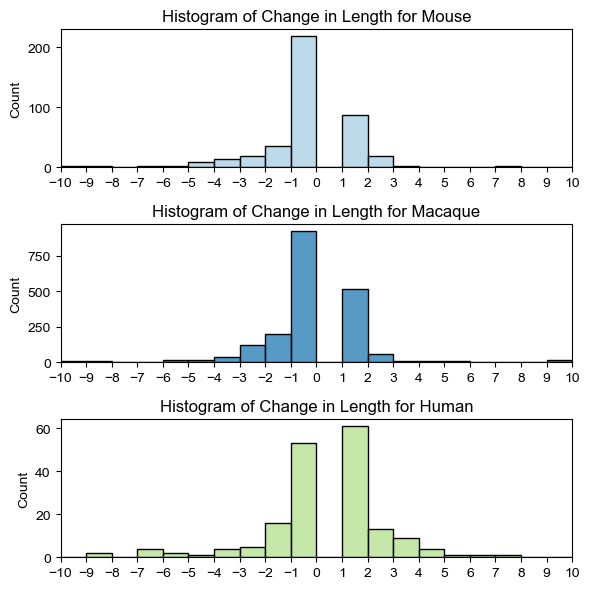

In [7]:
def plot_10bp():
    # Filter the dataframe to include only those rows where Change_in_length is within 10 of 0
    df_filtered = df_indels[(df_indels['Change_in_length'] >= -10) & (df_indels['Change_in_length'] <= 10)]

    # Create subplots for each species
    species_list = df_filtered['Species'].unique()
    fig, axes = plt.subplots(len(species_list), 1, figsize=(6, 2 * len(species_list)), sharex=False)

    custom_palette = ['#a6cee3','#1f78b4','#b2df8a']

    i = 0
    for ax, species in zip(axes, species_list):
        bins = np.arange(-10, 11, 1)
        sns.histplot(data=df_filtered[df_filtered['Species'] == species], x='Change_in_length', bins=bins, ax=ax, color=custom_palette[i])
        ax.set_title(f'Histogram of Change in Length for {species.capitalize()}')
        ax.set_xlabel('')
        ax.set_ylabel('Count')
        ax.set_xticks(np.arange(-10, 11, 1))  # Set x-ticks to show jumps of 1
        ax.set_xlim(-10, 10)  # Center the histogram at 0
        i += 1

    plt.tight_layout()
    plt.show()

plot_10bp()

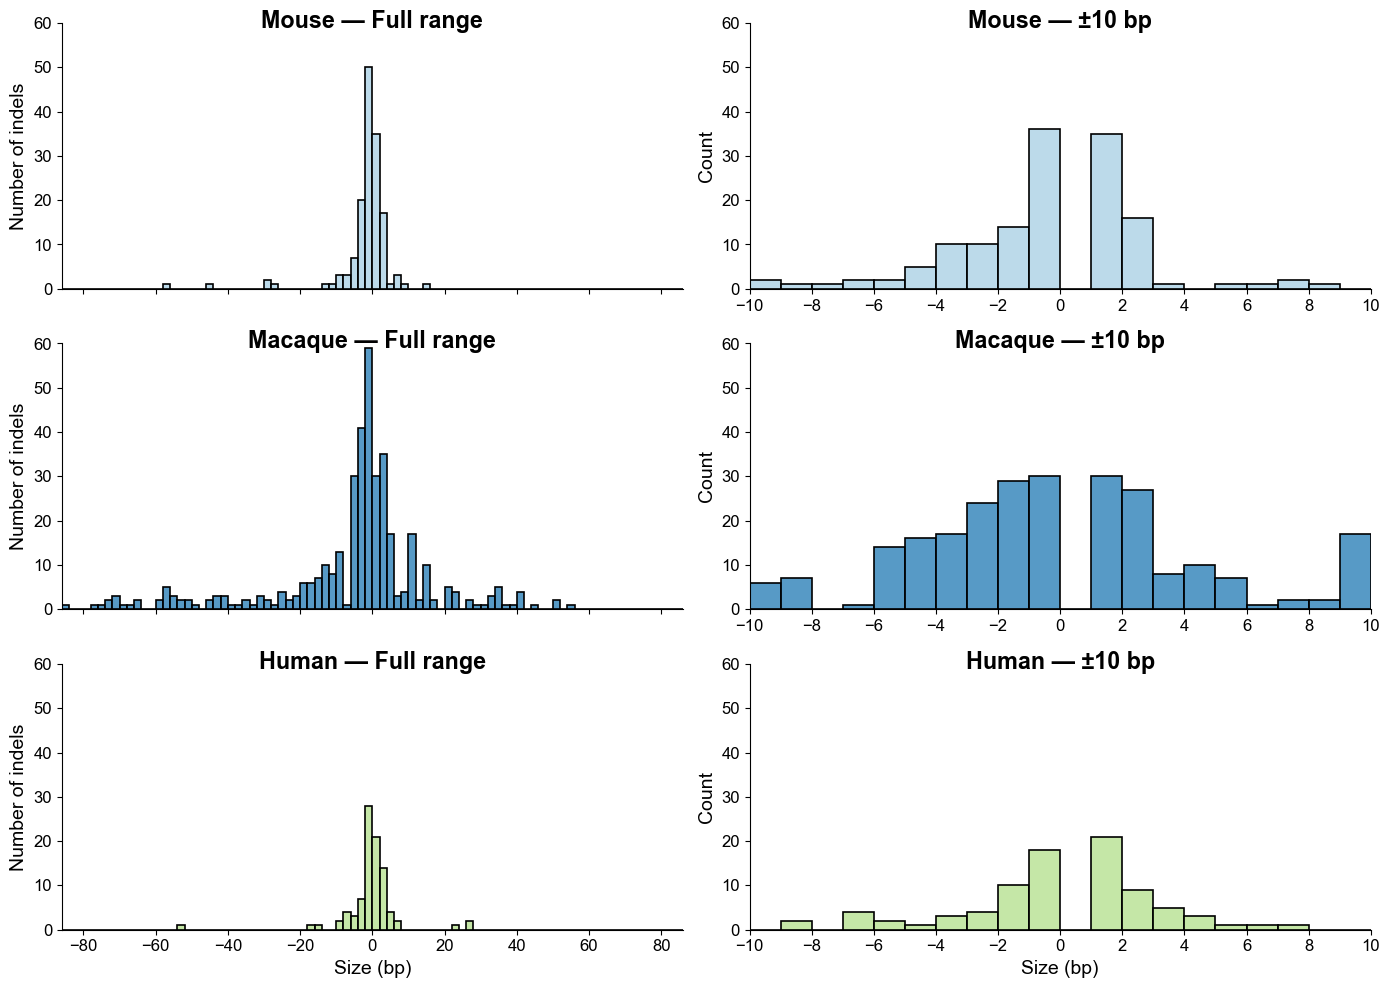

In [8]:
def combined_histograms():
	# Use existing df_indels and list_species/alignment variables from the notebook.
	df = df_indels[['Species','Individual','Change_in_length']].drop_duplicates()
	species_list = list_species  # preserve the order already used in the notebook

	# Color palette
	custom_palette = ['#a6cee3','#1f78b4','#b2df8a']

	# Figure with 3 rows (species) and 2 columns (full-range | zoom ±10).
	fig, axes = plt.subplots(len(species_list), 2, figsize=(14, 10), sharey=False)
	fontsize = 14

	# Full-range bins (left column) - keep same bin sizing as histogram_sizes(), exclude 0 from calculations
	df_nz = df[df['Change_in_length'] != 0]
	max_length = int(max(abs(df_nz['Change_in_length']))) if not df_nz.empty else 1
	bins_full = np.arange(-max_length, max_length + 1, 2)

	# Zoom bins (right column).
	bins_zoom = np.arange(-10, 11, 1)

	for i, species in enumerate(species_list):
		ax_full = axes[i, 0]
		ax_zoom = axes[i, 1]

		# Full-range histogram.
		sns.histplot(
			data=df[df['Species'] == species],
			x='Change_in_length',
			bins=bins_full,
			ax=ax_full,
			color=custom_palette[i],
			linewidth=1.2
		)
		ax_full.set_title(f"{species.capitalize()} — Full range", weight='bold', fontsize=fontsize*1.2, y=0.95)
		ax_full.set_ylim(0, 60)
		ax_full.set_ylabel('Number of indels', fontsize=fontsize)
		ax_full.set_xlabel('', fontsize=fontsize)
		
		axes[2, 0].set_xlabel('Size (bp)', fontsize=fontsize)
		# Adjust tick label sizes for both panels
		ax_full.tick_params(axis='both', which='major', labelsize=int(fontsize*0.9))
		ax_zoom.tick_params(axis='both', which='major', labelsize=int(fontsize*0.9))
		ax_full.set_xlim(-max_length, max_length)
		ax_full.spines['top'].set_visible(False)
		ax_full.spines['right'].set_visible(False)
		if i != len(species_list) - 1:
			ax_full.set_xticklabels([])

		# Zoom histogram ±10 bp.
		sns.histplot(
			data=df[df['Species'] == species],
			x='Change_in_length',
			bins=bins_zoom,
			ax=ax_zoom,
			color=custom_palette[i],
			linewidth=1.2
		)
		ax_zoom.set_title(f"{species.capitalize()} — ±10 bp", weight='bold', fontsize=fontsize*1.2, y=0.95)
		ax_zoom.set_xlim(-10, 10)
		ax_zoom.set_ylim(0, 60)
		ax_zoom.set_xticks(np.arange(-10, 11, 2))
		ax_zoom.set_xlabel('', fontsize=fontsize)
		axes[2, 1].set_xlabel('Size (bp)', fontsize=fontsize)
		ax_zoom.set_ylabel('Count', fontsize=fontsize)
		ax_zoom.spines['top'].set_visible(False)
		ax_zoom.spines['right'].set_visible(False)

	plt.tight_layout()
	# Save combined figure.
	fig.savefig('plots/png/figureS2_combined_histograms.png', bbox_inches='tight', format='png', dpi=600)
	fig.savefig('plots/pdf/figureS2_combined_histograms.pdf', bbox_inches='tight', format='pdf', dpi=600)
	plt.show()

combined_histograms()

In [9]:
# counts per species (matrix: rows=Species, cols=Change_in_length)
counts_by_species = df_indels[df_indels['Change_in_length'].between(-10, 10)].groupby(['Species','Change_in_length']).size().unstack(fill_value=0).sort_index(axis=1)
counts_by_species


Change_in_length,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,1,2,3,4,5,6,7,8,9,10
Species,,,,,,,,,,,,,,,,,,,,
human,0,2,0,4,2,1,4,5,16,53,61,13,9,4,1,1,1,0,0,0
macaque,7,7,0,1,14,19,35,123,200,926,515,59,11,11,7,1,2,2,2,15
mouse,2,2,1,2,2,8,14,19,35,219,88,19,2,0,1,1,2,1,0,0


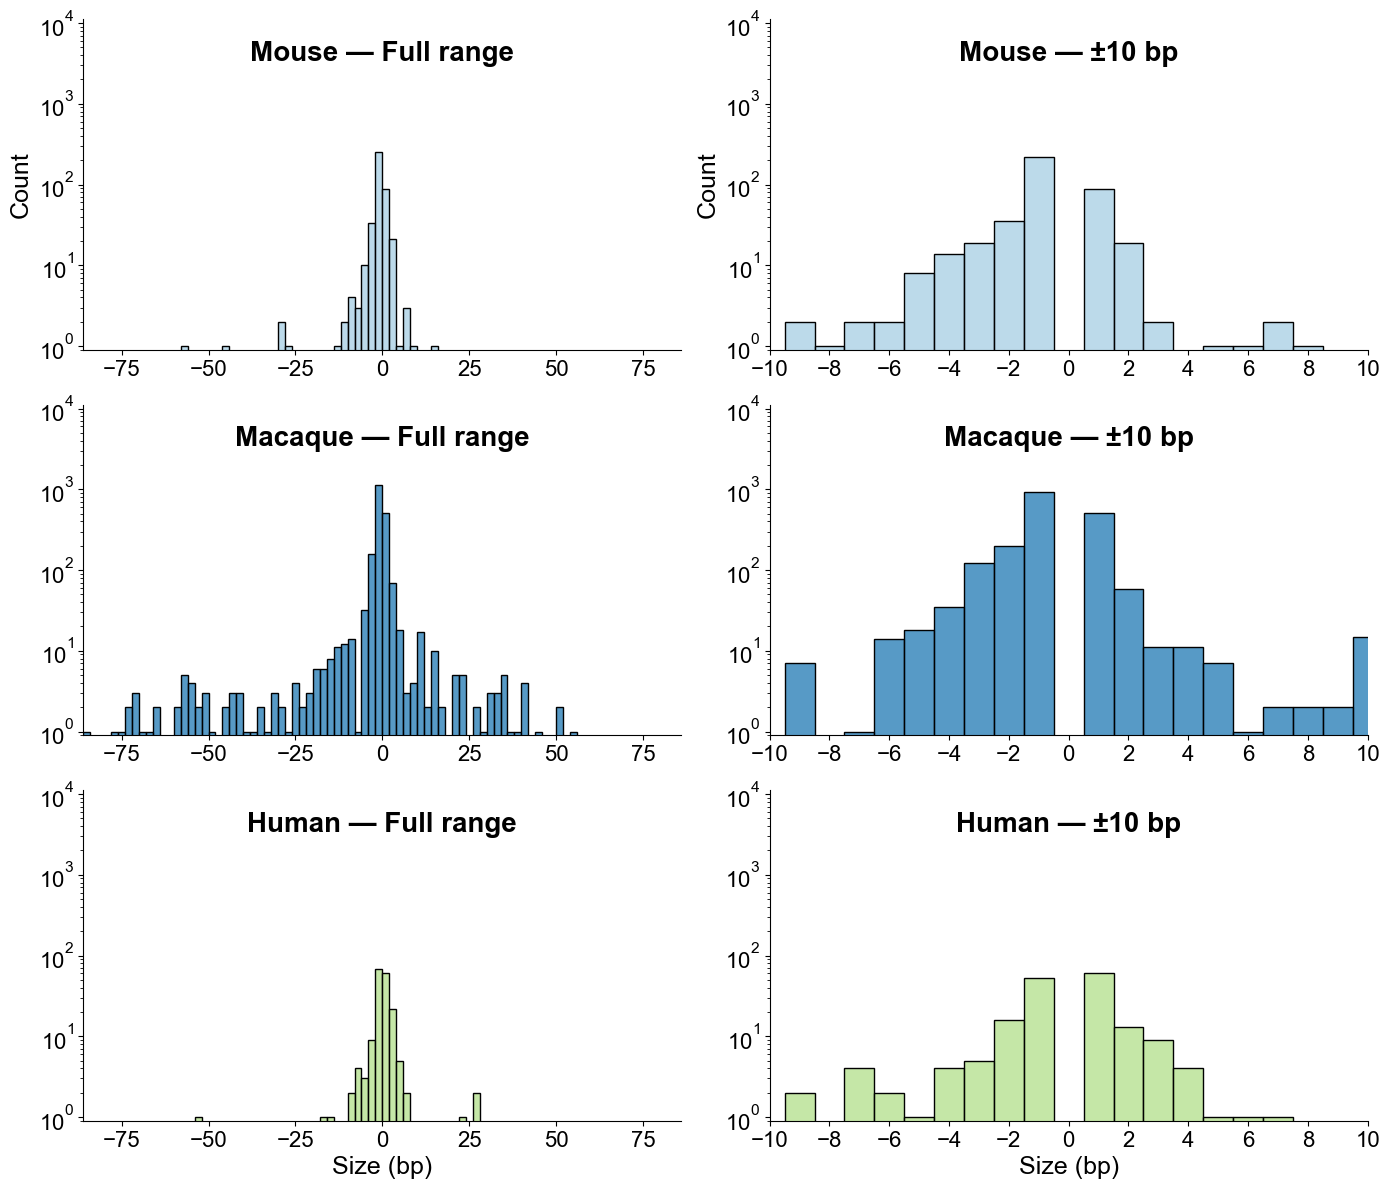

In [34]:

def plot_full_and_zoom_log_shared_y(filter_version='including'):
	# Use existing df_indels, list_species / species_idx, and custom_palette if present
	df = df_indels[['Species','Individual','Change_in_length','Mutation_ID','Tissue']].drop_duplicates()
	species_order = species_idx if 'species_idx' in globals() else list_species
	palette = custom_palette if 'custom_palette' in globals() else ['#a6cee3','#1f78b4','#b2df8a']

	# Full-range bins (match histogram_sizes() behavior: step=2, exclude zeros for range calc)
	df_nz = df[df['Change_in_length'] != 0]
	max_length = int(max(abs(df_nz['Change_in_length']))) if not df_nz.empty else int(df['Change_in_length'].abs().max())
	bins_full = np.arange(-max_length, max_length + 1, 2)

	# Zoom bins ±10
	bins_zoom = np.arange(-10, 11, 1) + 0.5  # center bars

	# Compute a common y-limit (use histogram counts) across all species and both panels
	global_max_count = 1
	for species in species_order:
		data = df[df['Species'] == species]['Change_in_length'].values
		if data.size:
			c_full, _ = np.histogram(data, bins=bins_full)
			c_zoom, _ = np.histogram(data, bins=bins_zoom)
			global_max_count = max(global_max_count, c_full.max() if c_full.size else 0, c_zoom.max() if c_zoom.size else 0)

	# Safety for log scale (must be > 0)
	y_bottom = 0.9
	y_top = max(global_max_count * 10, 10)  # leave headroom for log scale

	# Create subplots: rows = number of species, cols = 2 (full | ±10)
	fig, axes = plt.subplots(len(species_order), 2, figsize=(14, 4 * len(species_order)), sharey=False, sharex=False)
	if axes.ndim == 1:
		axes = axes.reshape(len(species_order), 2)

	fontsize = 18
	for i, species in enumerate(species_order):
		ax_full = axes[i, 0]
		ax_zoom = axes[i, 1]

		sns.histplot(
			data=df[df['Species'] == species],
			x='Change_in_length',
			bins=bins_full,
			ax=ax_full,
			color=palette[i % len(palette)],
			linewidth=1.0
		)
		ax_full.set_title(f"{species.capitalize()} — Full range", fontsize=fontsize+2, weight='bold', y=0.85)
		ax_full.set_xlim(-max_length, max_length)
		ax_full.set_xlabel('' if i != 3 else '', fontsize=fontsize)
		axes[2, 0].set_xlabel('' if i != 3 else '', fontsize=fontsize)
		ax_full.set_ylabel('Count' if i == 0 else '', fontsize=fontsize)
		ax_full.spines['top'].set_visible(False)
		ax_full.spines['right'].set_visible(False)
		
		sns.histplot(
			data=df[df['Species'] == species],
			x='Change_in_length',
			bins=bins_zoom,
			ax=ax_zoom,
			color=palette[i % len(palette)],
			linewidth=1.0
		)
		ax_zoom.set_title(f"{species.capitalize()} — ±10 bp", fontsize=fontsize+2, weight='bold', y=0.85)
		ax_zoom.set_xlim(-10, 10)
		ax_zoom.set_xticks(np.arange(-10, 11, 2))
		ax_zoom.set_xlabel('' if i != 3 else '', fontsize=fontsize)
		axes[2, 0].set_xlabel('' if i != 3 else '', fontsize=fontsize)
		ax_zoom.set_ylabel('Count' if i == 0 else '', fontsize=fontsize)
		ax_zoom.spines['top'].set_visible(False)
		ax_zoom.spines['right'].set_visible(False)
		
		# apply log scale and shared y-limits
		ax_full.set_yscale('log')
		ax_zoom.set_yscale('log')
		ax_full.set_ylim(y_bottom, y_top)
		ax_zoom.set_ylim(y_bottom, y_top)

	# X-axis labels only on bottom row
	axes[-1, 0].set_xlabel('Size (bp)', fontsize=fontsize)
	axes[-1, 1].set_xlabel('Size (bp)', fontsize=fontsize)

	# Increase tick label sizes for all subplots
	labelsize_major = int(fontsize * 0.9)
	labelsize_minor = int(fontsize * 0.75)
	for row in axes:
		for ax in row:
			ax.tick_params(axis='both', which='major', labelsize=labelsize_major)
			ax.tick_params(axis='both', which='minor', labelsize=labelsize_minor)

	plt.tight_layout()
	fig.savefig('plots/png/figureS2_combined_histograms.png', bbox_inches='tight', dpi=600)
	fig.savefig('plots/pdf/figureS2_combined_histograms.pdf', bbox_inches='tight', dpi=600)
	plt.show()

plot_full_and_zoom_log_shared_y()